# Opt the opinion after meeting

Time step 0: [100, 200, 50, 50, 0, 0], sum=400
Time step 1: [82.5, 157.5, 60.0, 80.0, 7.5, 12.5], sum=400.0
Time step 2: [61.2, 111.6, 70.8, 108.4, 18.0, 30.0], sum=399.99999999999994
Time step 3: [40.33, 70.54, 78.23, 127.06, 31.44, 52.4], sum=400.0
Time step 4: [24.23, 41.12, 78.93, 130.82, 46.84, 78.06], sum=400.00000000000006
Time step 5: [14.19, 23.75, 73.24, 121.97, 62.57, 104.28], sum=400.00000000000006
Time step 6: [8.67, 14.46, 64.12, 106.86, 77.21, 128.68], sum=400.00000000000006
Time step 7: [5.71, 9.51, 54.26, 90.43, 90.03, 150.05], sum=400.0000000000001
Time step 8: [4.06, 6.76, 45.06, 75.1, 100.89, 168.14], sum=400.0000000000001
Time step 9: [3.08, 5.13, 37.02, 61.7, 109.9, 183.16], sum=400.0000000000001
Time step 10: [2.47, 4.12, 30.23, 50.38, 117.3, 195.5], sum=400.0000000000001
Time step 11: [2.07, 3.46, 24.58, 40.97, 123.35, 205.58], sum=400.0000000000001
Time step 12: [1.8, 3.0, 19.94, 33.23, 128.26, 213.77], sum=400.00000000000006
Time step 13: [1.61, 2.68, 16.14, 2

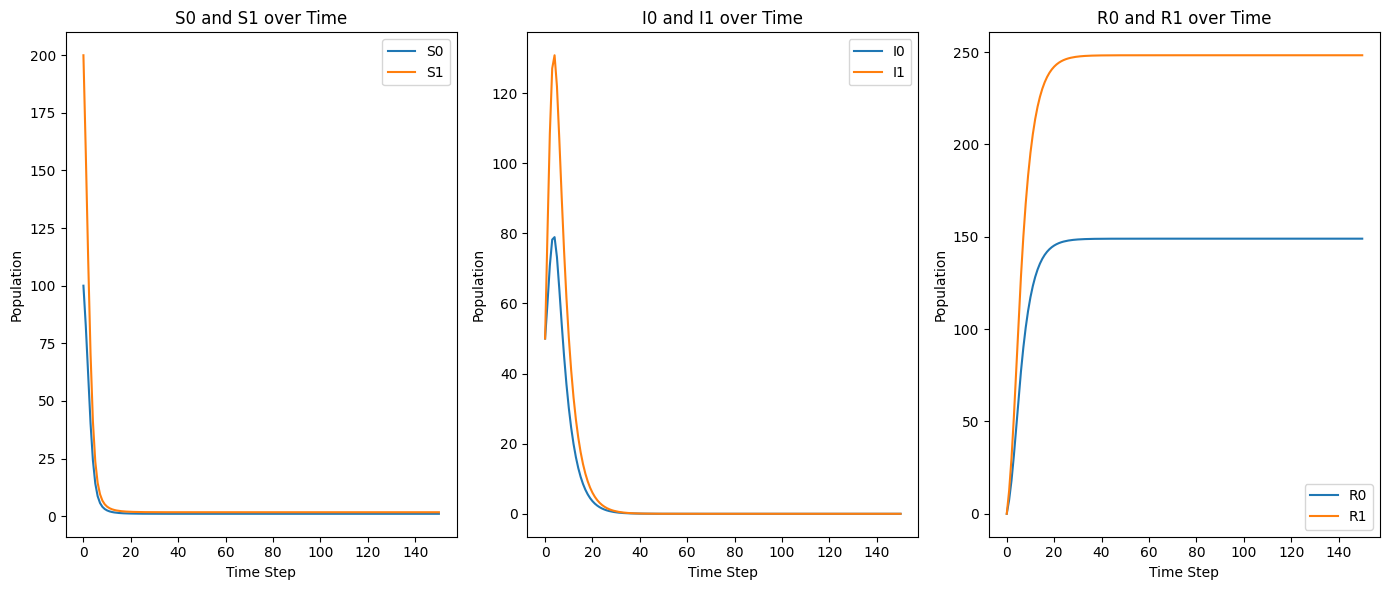

In [2]:
import numpy as np
import matplotlib.pyplot as plt

q = [-10, -20]

def pii1(q):
    return 1 / (1 + np.exp(q))
def pii2(q):
    return np.exp(q) / (1 + np.exp(q))

def transition_matrix(beta, gamma, statevector):
    # statevector = [s0 s1 i0 i1 r0 r1]

    N = np.sum(statevector)
    ps0 = statevector[0] / N
    ps1 = statevector[1] / N
    pi0 = statevector[2] / N
    pi1 = statevector[3] / N
    pr0 = statevector[4] / N
    pr1 = statevector[5] / N

    matrix = np.zeros((6, 6))
    
    matrix[0, 0] = ps0 + pi0 * (pii1(-10) * (1-beta) + pii2(-10)) + pr0  # S0 -> S0
    matrix[0, 1] = ps1 + pi1 * (pii1(-10) * (1-beta) + pii2(-10)) + pr1  # S0 -> S1
    matrix[0, 2] = pi0 * pii1(-10) * beta  # S0 -> I0
    matrix[0, 3] = pi1 * pii1(-10) * beta  # S0 -> I1

    matrix[1, 0] = ps0 + pi0 * (pii1(-20) * (1-beta) + pii2(-20)) + pr0   # S1 -> S0
    matrix[1, 1] = ps1 + pi1 * (pii1(-20) * (1-beta) + pii2(-20)) + pr1  # S1 -> S1
    matrix[1, 2] = pi0 * pii1(-20) * beta  # S1 -> I0
    matrix[1, 3] = pi1 * pii1(-20) * beta  # S1 -> I1

    matrix[2, 2] = (1-gamma) * (ps0 + pi0 + pr0)  # I0 -> I0
    matrix[2, 3] = (1-gamma) * (ps1 + pi1 + pr1)  # I0 -> I1 
    matrix[2, 4] = gamma  * (ps0 + pi0 + pr0) # I0 -> R0
    matrix[2, 5] = gamma  * (ps1 + pi1 + pr1) # I0 -> R1

    matrix[3, 2] = (1-gamma) * (ps0 + pi0 + pr0)  # I1 -> I0
    matrix[3, 3] = (1-gamma) * (ps1 + pi1 + pr1)  # I1 -> I1 
    matrix[3, 4] = gamma  * (ps0 + pi0 + pr0) # I1 -> R0
    matrix[3, 5] = gamma  * (ps1 + pi1 + pr1) # I1 -> R1

    matrix[4, 4] = ps0 + pi0 + pr0  # R0 -> R0
    matrix[4, 5] = ps1 + pi1 + pr1  # R0 -> R1

    matrix[5, 5] = ps1 + pi1 + pr1  # R1 -> R0
    matrix[5, 4] = ps0 + pi0 + pr0  # R1 -> R1



    return matrix

def simulate_transition(population, beta, gamma, steps):
    """Simulate the population transitions over a number of steps."""
    populations = [np.array(population)]
    for _ in range(steps):
        matrix = transition_matrix(beta, gamma, populations[-1])
        population = populations[-1] @ matrix
        populations.append(population)
    return populations

init_state = np.array([100, 200, 50, 50, 0, 0])
beta = 0.8  # Example infection rate
gamma = 0.2  # Example recovery rate
steps = 150 # Number of time steps to simulate
populations = simulate_transition(init_state, beta, gamma, steps)

# Printing results
for i, pop in enumerate(populations):
    print(f"Time step {i}: {[round(pi,2) for pi in pop]}, sum={np.sum(pop)}")


def plot_results(populations):
    timesteps = len(populations)
    S0 = [pop[0] for pop in populations]
    S1 = [pop[1] for pop in populations]
    I0 = [pop[2] for pop in populations]
    I1 = [pop[3] for pop in populations]
    R0 = [pop[4] for pop in populations]
    R1 = [pop[5] for pop in populations]

    time = np.arange(timesteps)

    plt.figure(figsize=(14, 6))

    # Plot S0 and S1
    plt.subplot(1, 3, 1)
    plt.plot(time, S0, label='S0')
    plt.plot(time, S1, label='S1')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('S0 and S1 over Time')
    plt.legend()

    # Plot I0 and I1
    plt.subplot(1, 3, 2)
    plt.plot(time, I0, label='I0')
    plt.plot(time, I1, label='I1')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('I0 and I1 over Time')
    plt.legend()

    # Plot R0 and R1
    plt.subplot(1, 3, 3)
    plt.plot(time, R0, label='R0')
    plt.plot(time, R1, label='R1')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('R0 and R1 over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

    
plot_results(populations)



# Dominance Model, when if other opinion is higher then one would opt it

Time step 0: [100, 100, 50, 50, 0, 0], sum=300
Time step 1: [36.67, 110.0, 33.33, 100.0, 5.0, 15.0], sum=300.0
Time step 2: [5.91, 88.62, 9.93, 148.88, 2.92, 43.75], sum=300.00000000000006
Time step 3: [0.21, 54.28, 0.65, 166.42, 0.31, 78.12], sum=300.0
Time step 4: [0.0, 30.22, 0.0, 157.94, 0.0, 111.84], sum=300.00000000000006
Time step 5: [0.0, 17.49, 0.0, 139.08, 0.0, 143.43], sum=300.0
Time step 6: [0.0, 11.0, 0.0, 117.75, 0.0, 171.25], sum=300.0000000000001
Time step 7: [0.0, 7.55, 0.0, 97.65, 0.0, 194.8], sum=300.0000000000001
Time step 8: [0.0, 5.58, 0.0, 80.09, 0.0, 214.33], sum=300.0000000000001
Time step 9: [0.0, 4.39, 0.0, 65.26, 0.0, 230.35], sum=300.0000000000001
Time step 10: [0.0, 3.63, 0.0, 52.98, 0.0, 243.4], sum=300.00000000000017
Time step 11: [0.0, 3.11, 0.0, 42.89, 0.0, 253.99], sum=300.00000000000017
Time step 12: [0.0, 2.76, 0.0, 34.67, 0.0, 262.57], sum=300.00000000000017
Time step 13: [0.0, 2.5, 0.0, 27.99, 0.0, 269.51], sum=300.00000000000017
Time step 14: [0.

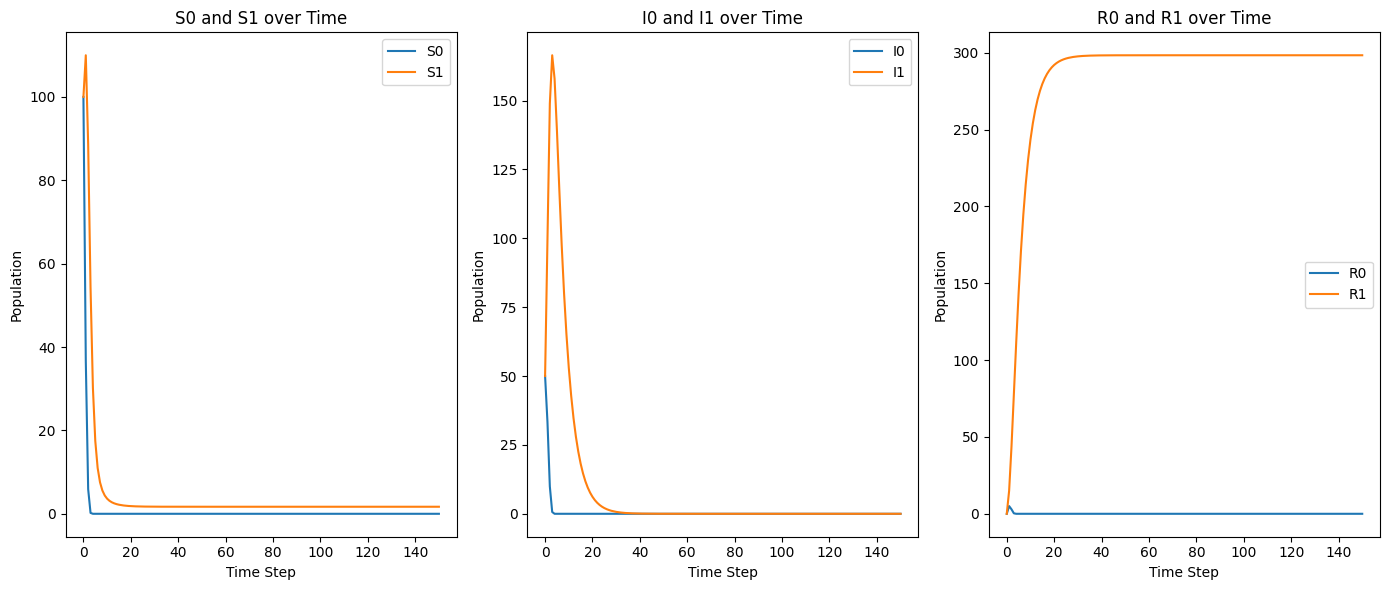

In [4]:
import numpy as np
import matplotlib.pyplot as plt

q = [-10, -20]

def pii1(q):
    return 1 / (1 + np.exp(q))
def pii2(q):
    return np.exp(q) / (1 + np.exp(q))

def transition_matrix(beta, gamma, statevector):
    # statevector = [s0 s1 i0 i1 r0 r1]

    N = np.sum(statevector)
    ps0 = statevector[0] / N
    ps1 = statevector[1] / N
    pi0 = statevector[2] / N
    pi1 = statevector[3] / N
    pr0 = statevector[4] / N
    pr1 = statevector[5] / N

    matrix = np.zeros((6, 6))

    matrix[0, 0] = ps0 + pi0 * (pii1(-10) * (1-beta) + pii2(-10)) + pr0  # S0 -> S0
    matrix[0, 1] = ps1 + pi1 * (pii1(-10) * (1-beta) + pii2(-10)) + pr1  # S0 -> S1
    matrix[0, 2] = pi0 * pii1(-10) * beta  # S0 -> I0
    matrix[0, 3] = pi1 * pii1(-10) * beta  # S0 -> I1

    
    matrix[1, 1] = ps1 + pi1 * (pii1(-10) * (1-beta) + pii2(-10)) + pr1 + ps0 + pi0 * (pii1(-10) * (1-beta) + pii2(-10)) + pr0 # S1 -> S1
    matrix[1, 3] = pi1 * pii1(-10) * beta + pi0 * pii1(-10) * beta  # S1 -> I1

    matrix[2, 2] = (1-gamma) * (ps0 + pi0 + pr0)  # I0 -> I0
    matrix[2, 3] = (1-gamma) * (ps1 + pi1 + pr1)  # I0 -> I1 
    matrix[2, 4] = gamma  * (ps0 + pi0 + pr0) # I0 -> R0
    matrix[2, 5] = gamma  * (ps1 + pi1 + pr1) # I0 -> R1

    
    matrix[3, 3] = (1-gamma) * (ps1 + pi1 + pr1) + (1-gamma) * (ps0 + pi0 + pr0) # I1 -> I1 
    matrix[3, 5] = gamma  * (ps1 + pi1 + pr1) + gamma  * (ps0 + pi0 + pr0) # I1 -> R1

    matrix[4, 4] = ps0 + pi0 + pr0  # R0 -> R0
    matrix[4, 5] = ps1 + pi1 + pr1  # R0 -> R1

    matrix[5, 5] = ps1 + pi1 + pr1 + ps0 + pi0 + pr0 # R1 -> R0'



    return matrix

def simulate_transition(population, beta, gamma, steps):
    """Simulate the population transitions over a number of steps."""
    populations = [np.array(population)]
    for _ in range(steps):
        matrix = transition_matrix(beta, gamma, populations[-1])
        population = populations[-1] @ matrix
        populations.append(population)
    return populations

init_state = np.array([100, 100, 50, 50, 0, 0])
beta = 0.8  # Example infection rate
gamma = 0.2  # Example recovery rate
steps = 150 # Number of time steps to simulate
populations = simulate_transition(init_state, beta, gamma, steps)

# Printing results
for i, pop in enumerate(populations):
    print(f"Time step {i}: {[round(pi,2) for pi in pop]}, sum={np.sum(pop)}")


def plot_results(populations):
    timesteps = len(populations)
    S0 = [pop[0] for pop in populations]
    S1 = [pop[1] for pop in populations]
    I0 = [pop[2] for pop in populations]
    I1 = [pop[3] for pop in populations]
    R0 = [pop[4] for pop in populations]
    R1 = [pop[5] for pop in populations]

    time = np.arange(timesteps)

    plt.figure(figsize=(14, 6))

    # Plot S0 and S1
    plt.subplot(1, 3, 1)
    plt.plot(time, S0, label='S0')
    plt.plot(time, S1, label='S1')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('S0 and S1 over Time')
    plt.legend()

    # Plot I0 and I1
    plt.subplot(1, 3, 2)
    plt.plot(time, I0, label='I0')
    plt.plot(time, I1, label='I1')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('I0 and I1 over Time')
    plt.legend()

    # Plot R0 and R1
    plt.subplot(1, 3, 3)
    plt.plot(time, R0, label='R0')
    plt.plot(time, R1, label='R1')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('R0 and R1 over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

    
plot_results(populations)

